In [58]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Load the data
The read_csv() function can now be used to load the dataset into pandas and mount it to a disk. This allows Colab to access the drive and transforms the CSV file into a Pandas dataframe.

In [59]:
# from google.colab import drive
# drive.mount('/content/drive')
df = pd.read_csv("final_data.csv")

## View the dataframe
The shape, head, tail, and columns methods of the panadas functions allow us to quickly gauge the size of our dataset. These techniques help us gain a deeper understanding of the data.


df.head(2)

In [60]:
df.shape

(10754, 22)

In [61]:
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [62]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

## Profiling Data
The practice of thoroughly analyzing the data in an existing dataset and gathering statistics and information about it is known as data profiling.

# Preprocess The Data

In [63]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [65]:
df["team"].value_counts(ascending=False)

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64

In [66]:
df["award"].value_counts(ascending=False)

award
0     4773
1     2211
2     1223
3      730
4      460
5      323
6      216
7      199
8      121
9      110
10      72
11      61
13      42
12      35
14      35
15      21
17      16
18      16
16      13
19      11
20      11
33       6
22       6
21       4
25       4
24       4
26       4
23       3
35       2
36       2
29       2
27       2
32       2
37       2
31       1
42       1
28       1
92       1
34       1
30       1
57       1
65       1
53       1
38       1
43       1
90       1
Name: count, dtype: int64

In [67]:
df["winger"].unique()

array([0, 1], dtype=int64)

In [68]:
df["position_encoded"].unique()

array([1, 2, 3, 4], dtype=int64)

In [69]:
df["height"].unique()

array([189.       , 196.       , 188.       , 175.       , 191.       ,
       194.       , 187.       , 185.       , 186.       , 178.       ,
       169.       , 180.       , 183.       , 182.       , 177.       ,
       184.       , 181.       , 179.       , 172.       , 174.       ,
       197.       , 195.       , 190.       , 176.       , 170.       ,
       192.       , 167.       , 198.       , 199.       , 193.       ,
       165.       , 200.       , 173.       , 163.       , 171.       ,
       168.       , 166.       , 202.       , 181.2403529, 164.       ,
       206.       , 160.       , 204.       , 156.       , 162.       ,
       159.       , 161.       ])

In [70]:
df.shape

(10754, 22)

## Data Quality Checks
 involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable

Here are typical steps involved in checking data quality

 **1.Reliability** :

Evaluate the data's source and collection process to determine its trustworthiness

In [71]:
# Licensed in kaggle

**2.Timeliness**:
 Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis

In [72]:
#in 2 season 2021-2022 and 2022-2023

**3.Consistency**:

*Confirm* that the data is consistent within the dataset and across multiple data sources.For example, the same data point should not have different values in different places

In [73]:
#Consistent

**4.Relevance:**

Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**The following are important factors for relevance:**

1. Sample Appropriateness: Verify that the goals of your analysis are met by the data sample you have chosen. For example, using statistics from the Northern region will not provide reliable information for the Kingdom's Western region.


2. Variable Selection: We can use the drop() technique to remove any columns that are irrelevant to our study. Since we are working with columns, we will set the "axis" parameter to 1. To make the change permanent, we will set the "inplace" argument to True.





In [74]:
# the data is relevant

**5. Uniqueness:**

Check for and remove duplicate records to prevent skewed analysis results.

In [75]:
df.duplicated().sum()
# no duplicates columns

0

In [76]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [77]:
# check columns types
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [78]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [79]:
df.shape

(10754, 22)

In [80]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [81]:
# Completeness
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [82]:
# Accurecy types
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [83]:
df.drop(columns=["team",'yellow cards', 'second yellow cards', 'red cards',"name", "player",'goals conceded','clean sheets'], inplace=True)

In [84]:
#drop whatever doesn't consider normal as a football player desription

df.drop(df[(df['age'] <= 19) | (df['age'] >= 40)].index, inplace=True)
df.drop(df[(df['current_value'] == 0) | (df['highest_value'] == 0)].index, inplace=True)
df.drop(df[(df['appearance'] == 0.00)].index, inplace=True)
df.drop(df[(df['height'] <= 150) | (df['height'] > 200)].index, inplace=True)
df.drop(df[df['current_value'] >= 50000000].index, inplace=True)
df.drop(df[df['current_value'] < 10000].index, inplace=True)
df.drop(df[df['highest_value'] >= 50000000].index, inplace=True)
df.drop(df[df['highest_value'] < 10000].index, inplace=True)

In [85]:
df.shape

(9345, 14)

**B. Feature engineering**


1.Feature scaling            
2.Aggregation                        
3.One hot coding


In [86]:
df.head(2)

,position,height,age,appearance,goals,assists,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
1,Goalkeeper,196.0,30.0,15,0.0,0.0,1304,510,58,1,1500000,22000000,1,0
2,Goalkeeper,188.0,37.0,4,0.0,0.0,292,697,84,4,600000,6000000,1,0


In [87]:
categorical_features = ['position']
numeric_features = ['height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'winger']

In [88]:
for i in categorical_features:
    print (df[i].value_counts())

position
Defender Centre-Back          1637
Attack Centre-Forward         1199
midfield-CentralMidfield       999
Goalkeeper                     949
midfield-DefensiveMidfield     803
Defender Right-Back            799
Defender Left-Back             734
midfield-AttackingMidfield     654
Attack-LeftWinger              637
Attack-RightWinger             636
midfield-RightMidfield          94
midfield-LeftMidfield           91
Attack-SecondStriker            55
midfield                        31
Attack                          19
Defender                         8
Name: count, dtype: int64


 **C. Feature selection**

In [89]:
df = df[['age', 'appearance','minutes played', 'highest_value']]

In [90]:
df.columns

Index(['age', 'appearance', 'minutes played', 'highest_value'], dtype='object')

In [91]:
df.head()

,age,appearance,minutes played,highest_value
1,30.0,15,1304,22000000
2,37.0,4,292,6000000
6,28.0,70,5471,35000000
7,31.0,8,416,20000000
8,21.0,34,2758,2000000


## Data should be prepared.

In [92]:
# Prepare data
X = df


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
X.shape

(9345, 4)

## Buliding the Model

In [94]:
wcss = []
for i in range(1, 40):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

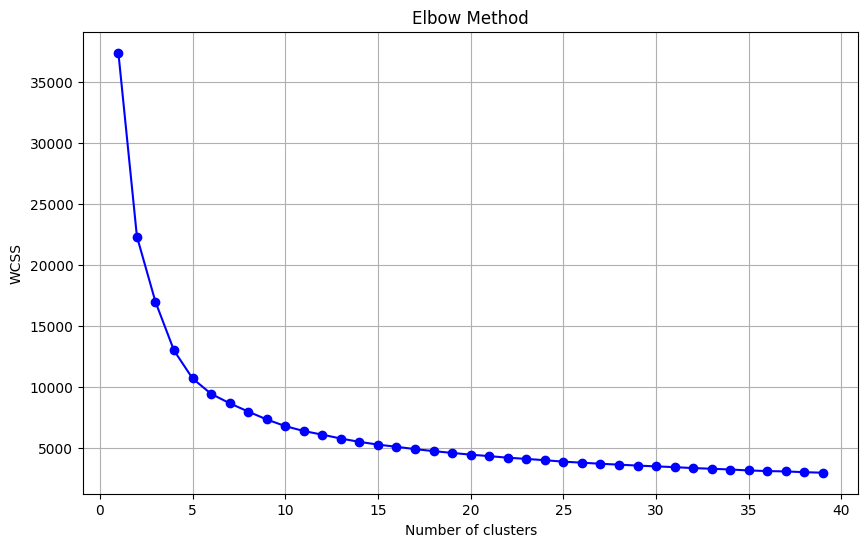

In [95]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [96]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 8 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train and Test the Model

In [97]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

## Evaluating the Model

In [98]:
X.head(2)

,age,appearance,minutes played,highest_value
1,30.0,15,1304,22000000
2,37.0,4,292,6000000


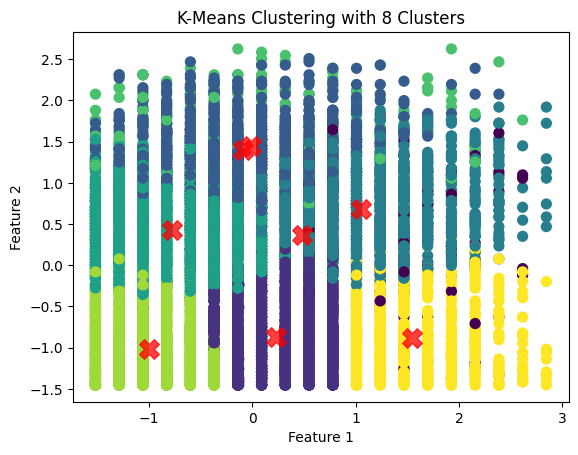

In [99]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [100]:
X['kmeans'] = y_pred

In [101]:
X['kmeans'].value_counts()

kmeans
6    1838
4    1769
1    1543
3    1325
2    1075
7     891
5     462
0     442
Name: count, dtype: int64

In [102]:
X[X['kmeans']==0]

,age,appearance,minutes played,highest_value,kmeans
1,30.0,15,1304,22000000,0
7,31.0,8,416,20000000,0
32,30.0,41,3606,17500000,0
47,30.0,69,4089,20000000,0
49,26.0,51,2609,18000000,0
...,...,...,...,...,...
9423,35.0,60,4752,22000000,0
9428,29.0,29,1596,20000000,0
10453,36.0,20,980,36500000,0
10685,32.0,27,1774,16000000,0


In [103]:
X.columns

Index(['age', 'appearance', 'minutes played', 'highest_value', 'kmeans'], dtype='object')

<Axes: xlabel='minutes played', ylabel='age'>

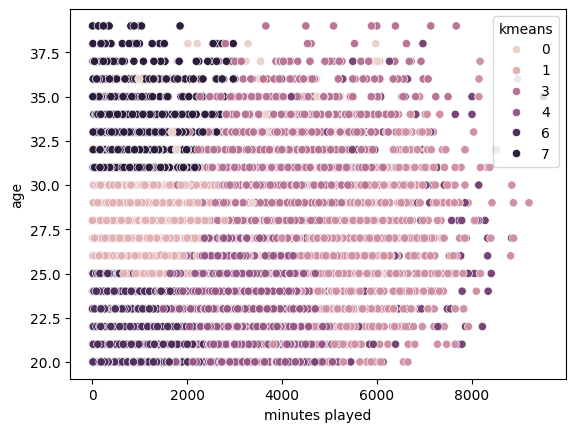

In [104]:
sns.scatterplot(data = X , x = 'minutes played', y = 'age', hue = 'kmeans')

<Axes: xlabel='minutes played', ylabel='age'>

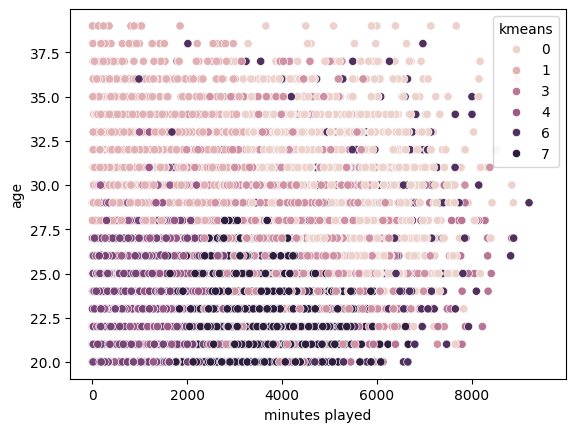

In [55]:
sns.scatterplot(data = X , x = 'minutes played', y = 'age', hue = 'kmeans')

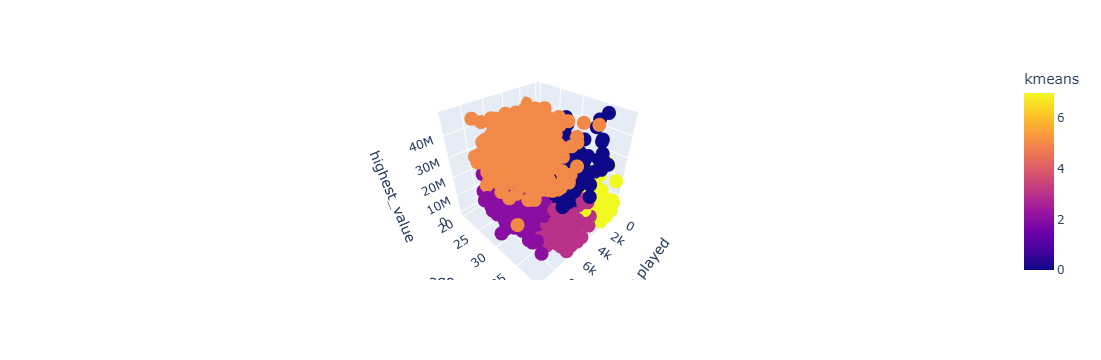

In [105]:
import plotly
import plotly.express as px

fig = px.scatter_3d(X, x='minutes played', y='age', z='highest_value',
              color='kmeans')
fig.show()


In [106]:
import joblib
joblib.dump(model, 'kmeans_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']